# Simulacion del potencial de GHK en lenguaje simbolico matematico

Mediante este laboratorio descubrira la deficion de variables matematicas en lenguaje simbolico para introducir las ecuaciones y funciones en el tiempo que permiten calcular el potencial de Nernst y el potencial de Goldman-Hodgkin-Katz.

La actividad consiste en escribir de manera correcta el valor de la variable o de la funcion faltante dentro de una celda remplazando el valor `None`. Ejemplo:

In [ ]:
K_o = 125
K_i = 30

# Definal el valor de relacion de concentracion de potacio extracelular
# respecto a la concentracion intracelular del mismo ion.

dKio = None


Resultado esperado: `dKio = K_o/K_i`

Tabla 1 de valores de concentracion.

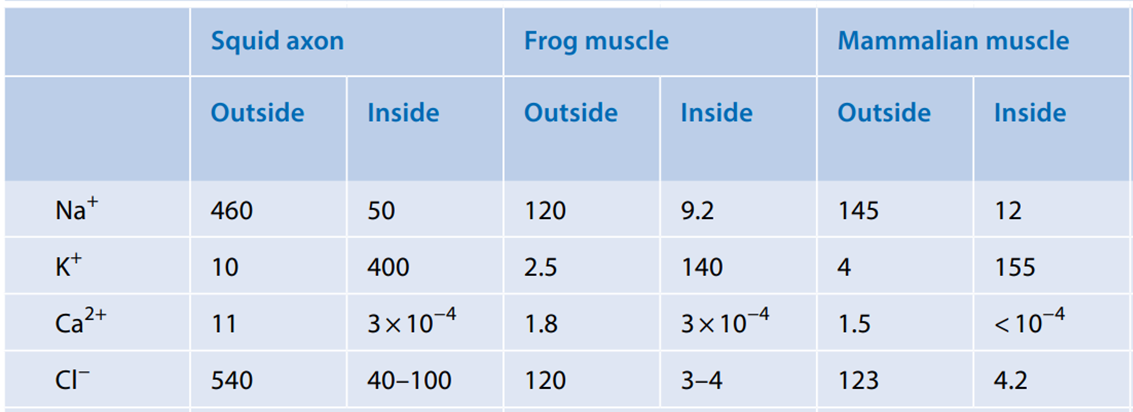

**Nota**: considere Cl=100 y Cl=4 para el calamar y la rana respectivamente.

## 1. Instalacion de la libreria SymPy

La celda solo instalara la libreria si es necesario

In [ ]:
try:
  import sympy
  print('SymPy fue importado con exito')
except:
  !pip install sympy

SymPy fue importado con exito


## 2. Importar modulos requeridos para definicion de variables simbolicas

Seleccionar alguna de las 2 opciones disponibles:

    * Symbol <- permite definir solo una variable simbolica matematica
    * symbols <- permite definir varias variables simbolicas a la *vez*

In [ ]:
from sympy import Symbol
from sympy import log

Definicion de variables simples y de metodo de representacion

In [ ]:
x = Symbol('x')
x

x

In [ ]:
y = Symbol('y')
y

y

In [ ]:
z = x**2+y**3+3*x*y+2*y-3*x

In [ ]:
z

x**2 + 3*x*y - 3*x + y**3 + 2*y

Solucion de operaciones con variables simbolicas mediante la asignacion de valores numericos a las variables simbolicas matematicas

In [ ]:
z = 3*x+y
z

3*x + y

In [ ]:
z.subs({x:3,y:1})

10

## 3. Simulacion del potencial de Nernst del Potasio del musculo de una rana

Definicion de las constantes de la ecuacion

In [ ]:
from sympy import symbols, log

R, T, F = symbols('R T F')

Definicion de variables para calcular el potencial de Nernst del K

In [ ]:
K_in, K_out, K_z = symbols('K_in K_out K_z')

Definicion de la funcion del potencial de Nernst del K

In [ ]:
V_K = (R * T / (K_z*F)) *log(K_out / K_in)

In [ ]:
V_K

R*T*log(K_out/K_in)/(F*K_z)

Resultado esperado.


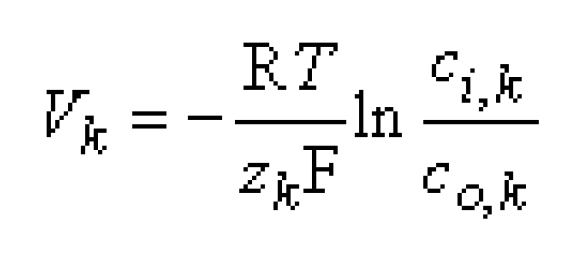

Asignacion de valores numericos a las variables de concentracion de K

In [ ]:
K_in_value = 140  # mM
K_out_value = 2.5  # mM
K_z_value = 62

# Sustitución de valores y cálculo del potencial de Nernst del potasio
V_K_value = V_K.subs({R: 8.314, T: 298, F: 96485, K_in: K_in_value, K_out: K_out_value,K_z:K_z_value})
V_K_value

-0.00166716515171472

Obtenga el potencial de Nernst del Sodio y del Cloro del musculo de rana con los datos de la Tabla 1.

Recuerde definir las variables necesarias, mostrar la ecuacion en lenguaje simbolico en una celda, y el resultado de la operacion en la siguiente celda.

In [ ]:
# Definición de variables para el sodio y el cloro
Na_in, Na_out, Na_z = symbols('Na_in Na_out Na_z')
Cl_in, Cl_out, Cl_z = symbols('Cl_in Cl_out Cl_z')

# Funciones del potencial de Nernst del sodio y del cloro
V_Na = (R * T / (Na_z*F)) * log(Na_out / Na_in)
V_Cl = (R * T / (Cl_z*F)) * log(Cl_out / Cl_in)

V_Na


R*T*log(Na_out/Na_in)/(F*Na_z)

In [ ]:
V_Cl

R*T*log(Cl_out/Cl_in)/(Cl_z*F)

In [ ]:
Na_in_value = 9.2
Na_out_value = 120
Na_z_value = 62

V_Na_value = V_Na.subs({R: 8.314, T: 298, F: 96485, Na_in: Na_in_value, Na_out: Na_out_value,Na_z:Na_z_value})
V_Na_value

0.00106369853207182

In [ ]:
Cl_in_value = 4
Cl_out_value = 120
Cl_z_value = 38

V_Cl_value = V_Cl.subs({R: 8.314, T: 298, F: 96485, Cl_in: Cl_in_value, Cl_out: Cl_out_value,Cl_z:Cl_z_value})
V_Cl_value

0.000675745070818207*log(30)

## 4. Definicion de la ecuacion del potencial de GHK

Utilice los siguientes valores de permeabilidad para simular el potencial de GHK de un:

Axon de calamar:
* P_Na=0.04
* P_K=1
* P_Cl=0.45

Musculo de rana
* P_Na=2*(10^(-8))
* P_K=2*(10^(-6))
* P_Cl=4*(10^(-6))

Musculo de un mamifero
* P_Na=0.04
* P_K=1
* P_Cl=0.45



In [ ]:
from sympy import symbols, log

# Definir las variables simbólicas para las permeabilidades
P_Na, P_K, P_Cl = symbols('P_Na P_K P_Cl')

# Definir las constantes necesarias para la ecuación de GHK
R, T, F = symbols('R T F')

# Definir la ecuación del potencial de GHK
V_axon_calamar = (R * T / F) * log((P_Na * Na_out + P_K * K_out + P_Cl * Cl_in) / (P_Na * Na_in + P_K * K_in + P_Cl * Cl_out))
V_axon_calamar


R*T*log((Cl_in*P_Cl + K_out*P_K + Na_out*P_Na)/(Cl_out*P_Cl + K_in*P_K + Na_in*P_Na))/F

In [ ]:
# Asignar los valores numéricos para el axón de calamar
P_Na_value = 0.04
P_K_value = 1
P_Cl_value = 0.45
K_in_value = 140
K_out_value = 2.5
Cl_in_value = 4
Cl_out_value = 120
Na_in_value = 9.2
Na_out_value = 120

# Sustituir los valores numéricos en la ecuación de GHK
V_axon_calamar_value = V_axon_calamar.subs({R: 8.314, T: 298, F: 96485,P_Na: P_Na_value, P_K: P_K_value, P_Cl: P_Cl_value,K_in: K_in_value, K_out: K_out_value, Cl_in: Cl_in_value, Cl_out: Cl_out_value, Na_in: Na_in_value, Na_out: Na_out_value})

# Mostrar el resultado
print("El potencial de GHK para el axón de calamar es:", V_axon_calamar_value)


El potencial de GHK para el axón de calamar es: -0.0786136113589787


Repita el proceso de las 2 celdas anteriores para obtener el potencial de GHK de un musculo de rana y uno de un mamifero.

In [ ]:
# Asignar los valores numéricos para el músculo de rana
P_Na_value_rana = 2 * (10 ** (-8))
P_K_value_rana = 2 * (10 ** (-6))
P_Cl_value_rana = 4 * (10 ** (-6))
K_in_value_rana = 140
K_out_value_rana = 2.5
Cl_in_value_rana = 4
Cl_out_value_rana = 120
Na_in_value_rana = 9.2
Na_out_value_rana = 120

# Sustituir los valores numéricos en la ecuación de GHK para el músculo de rana
V_musculo_rana = V_axon_calamar.subs({R: 8.314, T: 298, F: 96485,P_Na: P_Na_value_rana,
                                      P_K: P_K_value_rana, P_Cl: P_Cl_value_rana,
                                      K_in: K_in_value_rana, K_out: K_out_value_rana,
                                      Cl_in: Cl_in_value_rana, Cl_out: Cl_out_value_rana,
                                      Na_in: Na_in_value_rana, Na_out: Na_out_value_rana})

print("El potencial de GHK para el músculo de rana es:", V_musculo_rana)


El potencial de GHK para el músculo de rana es: -0.0893816995968404


In [ ]:
# Asignar los valores numéricos para el músculo de mamífero
P_Na_value_mamifero = 0.04
P_K_value_mamifero = 1
P_Cl_value_mamifero = 0.45
K_in_value_mamifero = 140
K_out_value_mamifero = 5
Cl_in_value_mamifero = 4
Cl_out_value_mamifero = 120
Na_in_value_mamifero = 9.2
Na_out_value_mamifero = 120

# Sustituir los valores numéricos en la ecuación de GHK para el músculo de mamífero
V_musculo_mamifero = V_axon_calamar.subs({R: 8.314, T: 298, F: 96485,P_Na: P_Na_value_mamifero, P_K: P_K_value_mamifero, P_Cl: P_Cl_value_mamifero,
                                          K_in: K_in_value_mamifero, K_out: K_out_value_mamifero,
                                          Cl_in: Cl_in_value_mamifero, Cl_out: Cl_out_value_mamifero,
                                          Na_in: Na_in_value_mamifero, Na_out: Na_out_value_mamifero})

print("El potencial de GHK para el músculo de mamífero es:", V_musculo_mamifero)


El potencial de GHK para el músculo de mamífero es: -0.0723806969403664


## 5. Genere variaciones en las concentraciones ionicas en el tiempo para describir el comportamiento observado

Las variables de concentracion ionica estan dadas como valores estaticos en la Tabla 1. Agregue una variacion sinoidal de 10% del valor minimo de concentracion ionica en ambas terminales de la membrana celular y genere una simulacion por 2 periodos de onda. Introduzca esta variacion al canal de Na del axon de calamar. Grafique su resultado.

Vin = sin(2*pi*t*f/T)

VNa = ENa*Vin

donde: f=60hz, T=1/f y t=vector tiempo

In [ ]:
import sympy

V_in,V_Na,z_Na,t,f,Ts= sympy.symbols('V_in V_Na E_Na t f T_s')
V_in,V_Na,z_Na,t,f,Ts

(V_in, V_Na, E_Na, t, f, T_s)

In [ ]:
V_in = sympy.sin(2*sympy.pi*t*f/Ts)
V_in

sin(2*pi*f*t/T_s)

In [ ]:
#z_Na como la razón de las concentraciones
z_Na = Na_out/Na_in
V_Na = z_Na * V_in
V_Na

Na_out*sin(2*pi*f*t/T_s)/Na_in

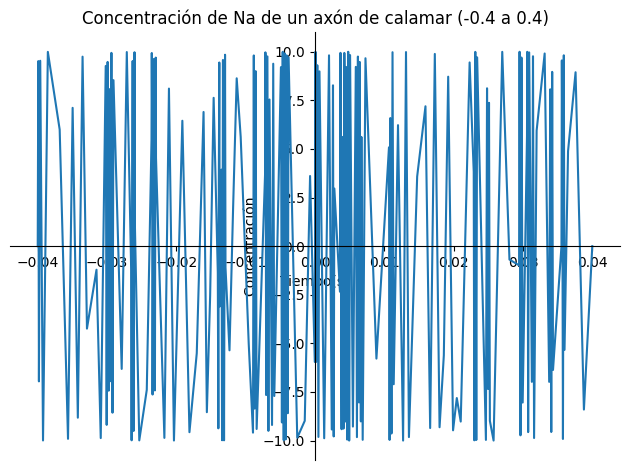

In [ ]:
#Un periodo es T = 1/60. 2T = 2/60 = 0.033334
sympy.plot(V_Na.subs({Na_out:400,Na_in:40,f:60,Ts:1/60}),(t,-0.04,0.04),
           title="Concentración de Na de un axón de calamar (-0.4 a 0.4)",xlabel="Tiempo(s)",
           ylabel="Concentración")

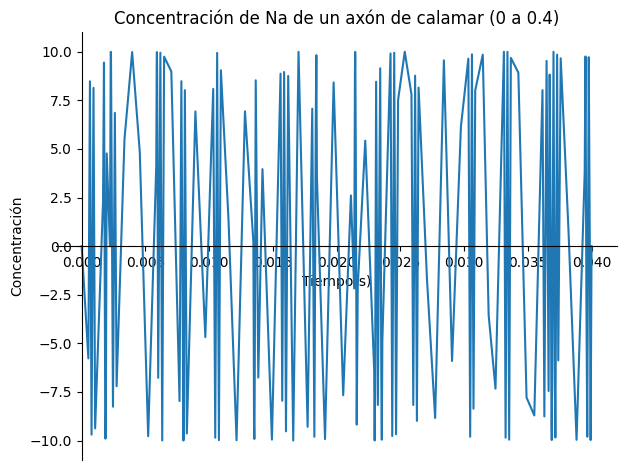

In [ ]:
# t 0 a 0.4
sympy.plot(V_Na.subs({Na_out:400,Na_in:40,f:60,Ts:1/60}),(t,0,0.04),
           title="Concentración de Na de un axón de calamar (0 a 0.4)",xlabel="Tiempo(s)",
           ylabel="Concentración")

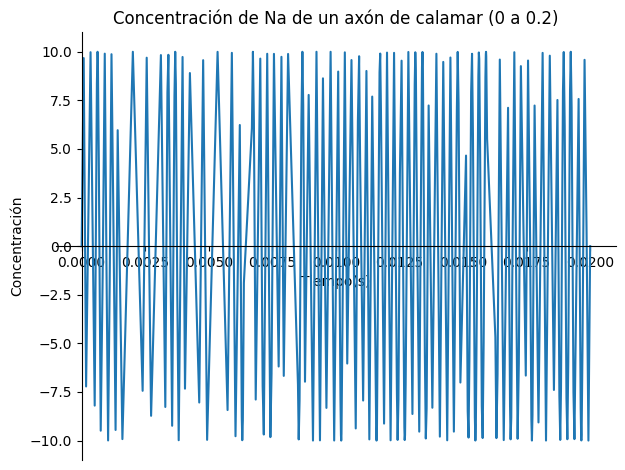

In [ ]:
#t 0 a 0.02
sympy.plot(V_Na.subs({Na_out:400,Na_in:40,f:60,Ts:1/60}),(t,0,0.02),
           title="Concentración de Na de un axón de calamar (0 a 0.2)",xlabel="Tiempo(s)",
           ylabel="Concentración")

Para concentracion intra y extra celular de z_Na = 400

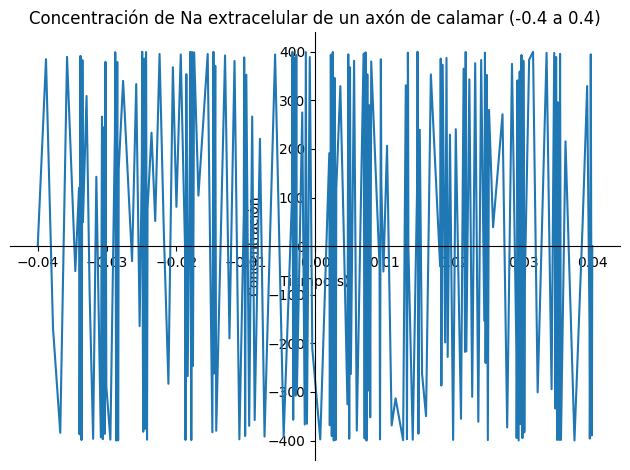

In [ ]:
sympy.plot(V_Na.subs({Na_out:400,Na_in:1,f:60,Ts:1/60}),(t,-0.04,0.04),
           title="Concentración de Na extracelular de un axón de calamar (-0.4 a 0.4)",
           xlabel="Tiempo(s)",ylabel="Concentración")

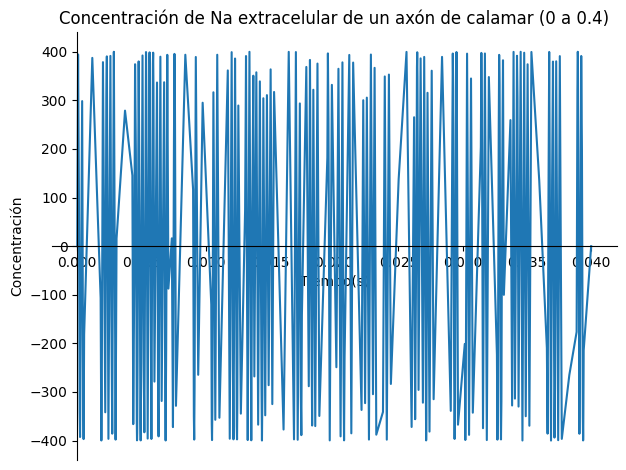

In [ ]:
sympy.plot(V_Na.subs({Na_out:400,Na_in:1,f:60,Ts:1/60}),(t,0,0.04),
           title="Concentración de Na extracelular de un axón de calamar (0 a 0.4)",
           xlabel="Tiempo(s)",ylabel="Concentración")

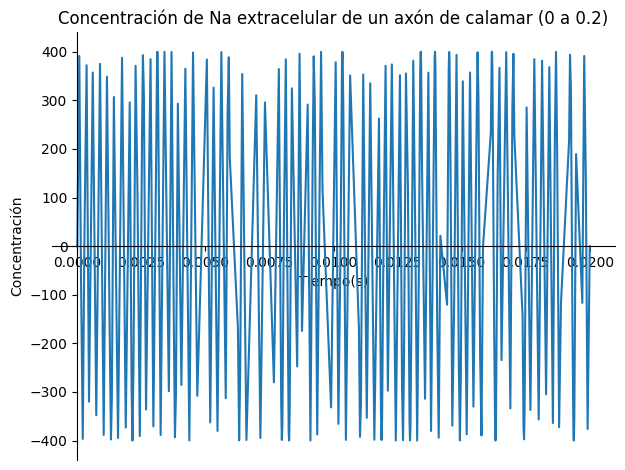

In [ ]:
sympy.plot(V_Na.subs({Na_out:400,Na_in:1,f:60,Ts:1/60}),(t,0,0.02),
           title="Concentración de Na extracelular de un axón de calamar (0 a 0.2)",
           xlabel="Tiempo(s)",ylabel="Concentración")

Para z_Na = 40

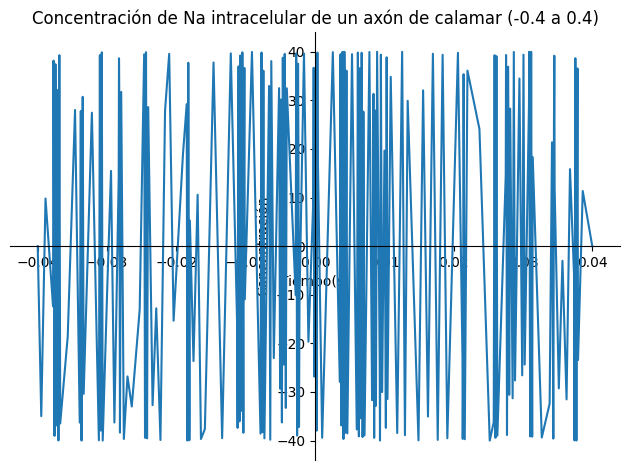

In [ ]:
sympy.plot(V_Na.subs({Na_out:40,Na_in:1,f:60,Ts:1/60}),(t,-0.04,0.04),
           title="Concentración de Na intracelular de un axón de calamar (-0.4 a 0.4)",
           xlabel="Tiempo(s)",ylabel="Concentración")

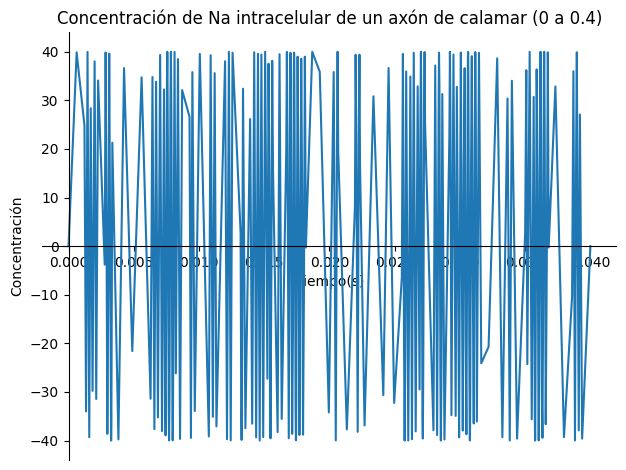

In [ ]:
sympy.plot(V_Na.subs({Na_out:40,Na_in:1,f:60,Ts:1/60}),(t,0,0.04),
           title="Concentración de Na intracelular de un axón de calamar (0 a 0.4)",
           xlabel="Tiempo(s)",ylabel="Concentración")

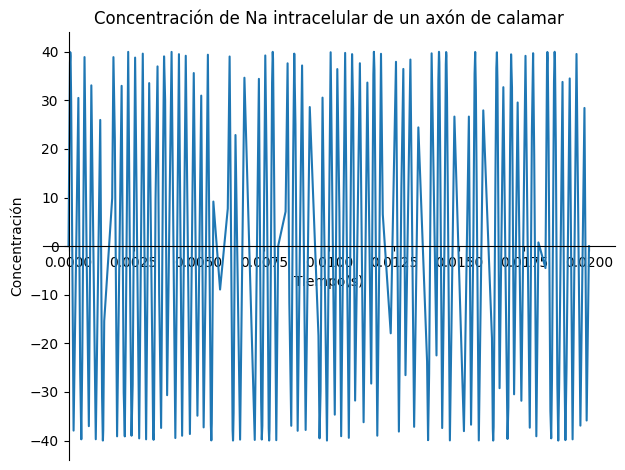

In [ ]:
sympy.plot(V_Na.subs({Na_out:40,Na_in:1,f:60,Ts:1/60}),(t,0,0.02),
           title="Concentración de Na intracelular de un axón de calamar",
           xlabel="Tiempo(s)",ylabel="Concentración")